In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

import tensorflow as tf

import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, Flatten, \
Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.layers.experimental.preprocessing import TextVectorization
from keras.models import Sequential, load_model
from keras import initializers, regularizers, optimizers, layers
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant


# !pip install -q -U keras-tuner
# import kerastuner as kt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


import re

from IPython.display import display 

import seaborn as sns
import matplotlib.pyplot as plt
from src import load_text, get_word_index

!python -m spacy download en_core_web_lg
import en_core_web_lg


sns.set(context = 'notebook', style = 'whitegrid')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',50)

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\caell\new_Anaconda3\python.exe -m pip install --upgrade pip' command.


https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633

GloVe embeddigns thanks to Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]




Thanks to https://keras.io/examples/nlp/pretrained_word_embeddings/ and Kefei Mo https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633 

for the below

In [26]:
df = load_text(sentences=True, grammarize=False)
word_index = get_word_index(df)
X = df.Text
y = df.Grade
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)
#fit the vectorizer on the text and extract the corpus vocabulary

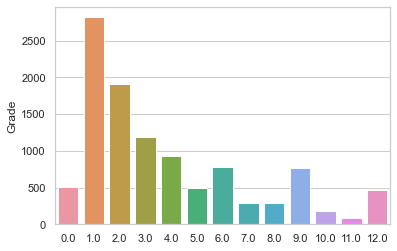

In [27]:
sns.barplot(x=y.unique(),y=y.value_counts())

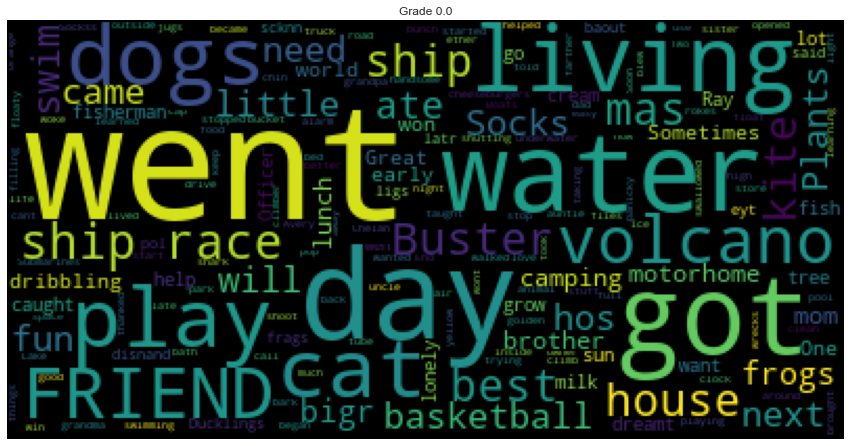

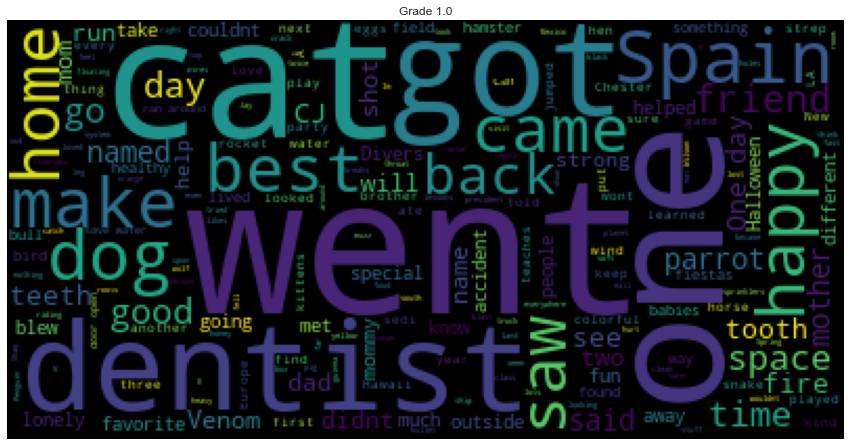

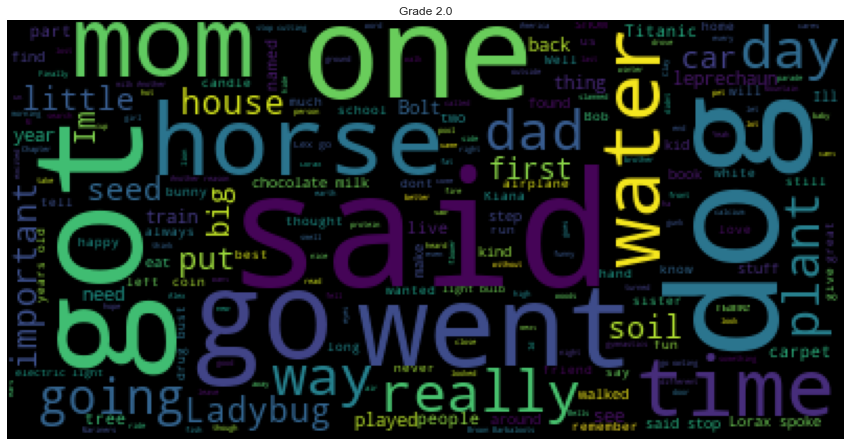

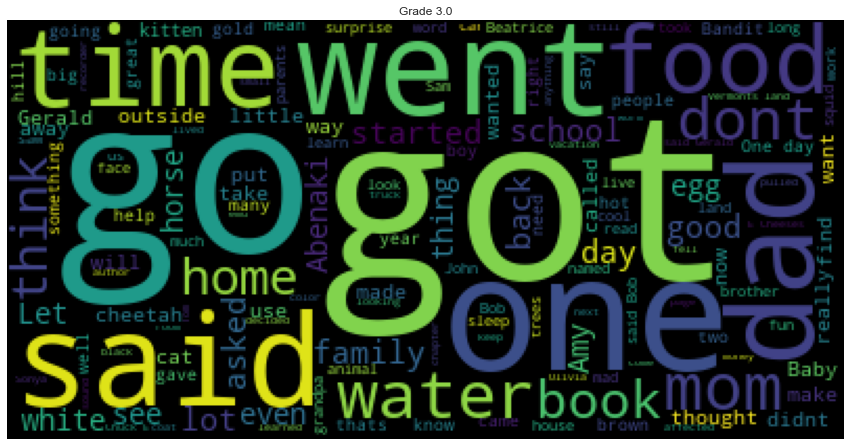

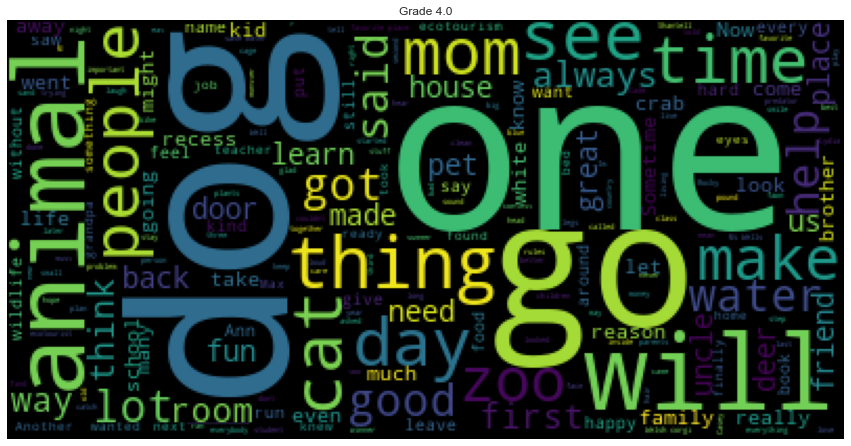

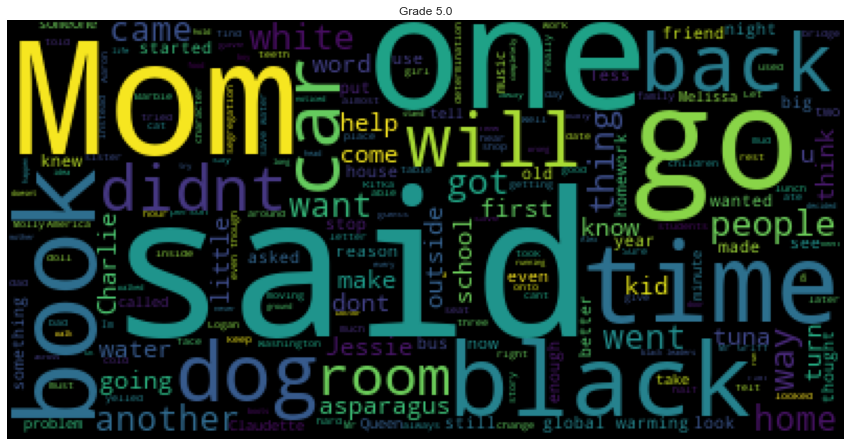

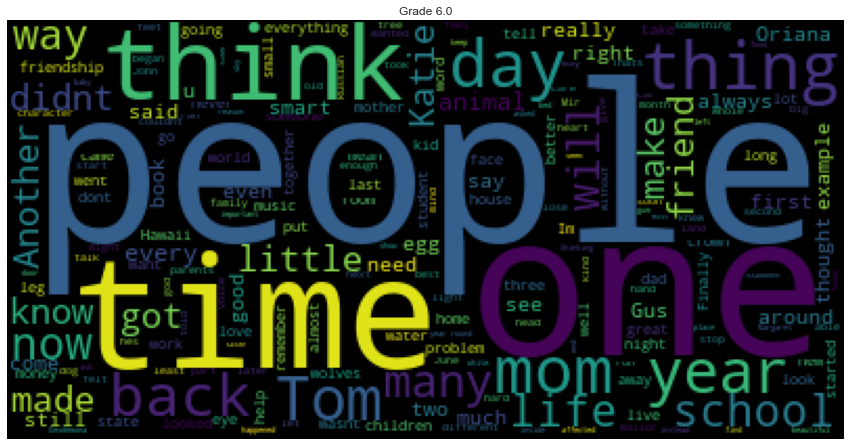

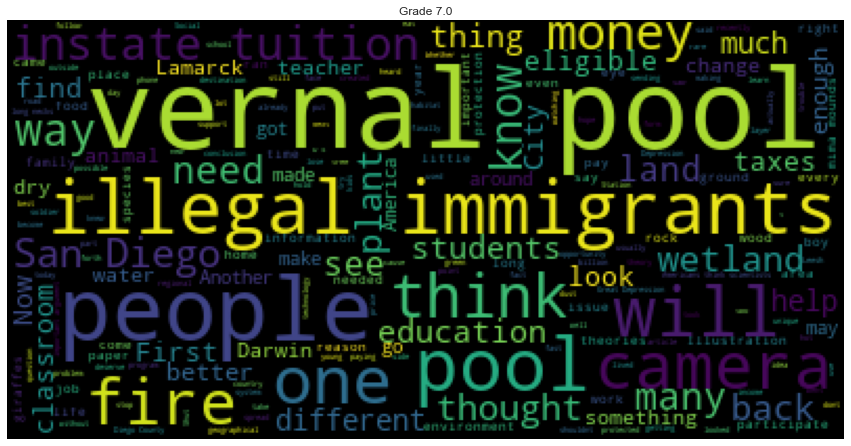

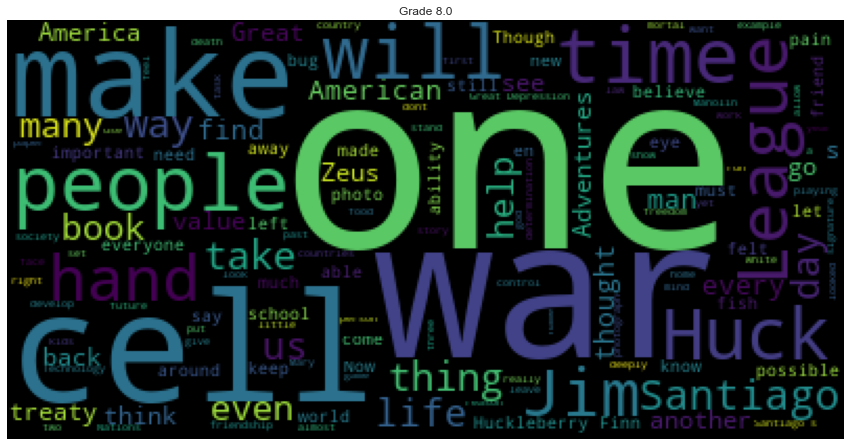

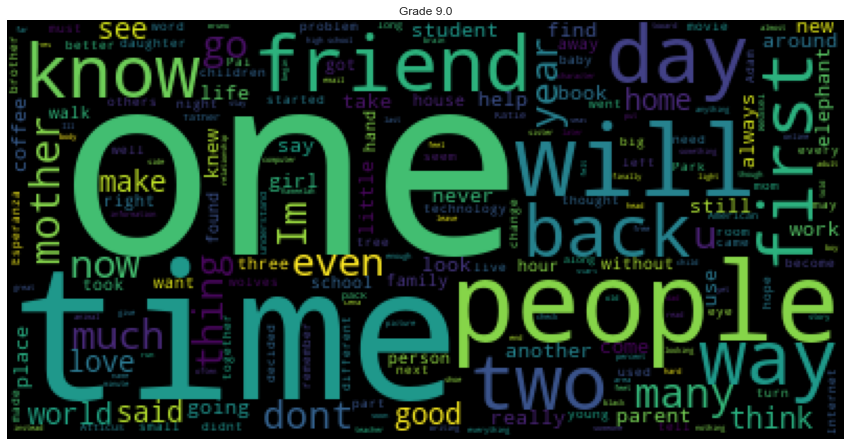

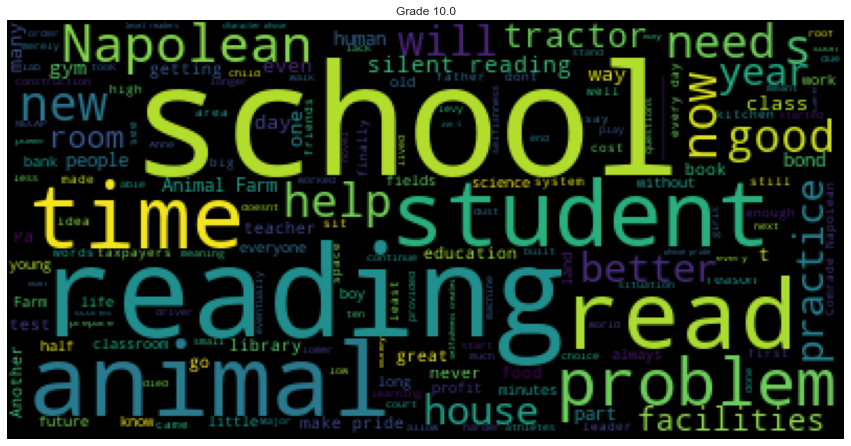

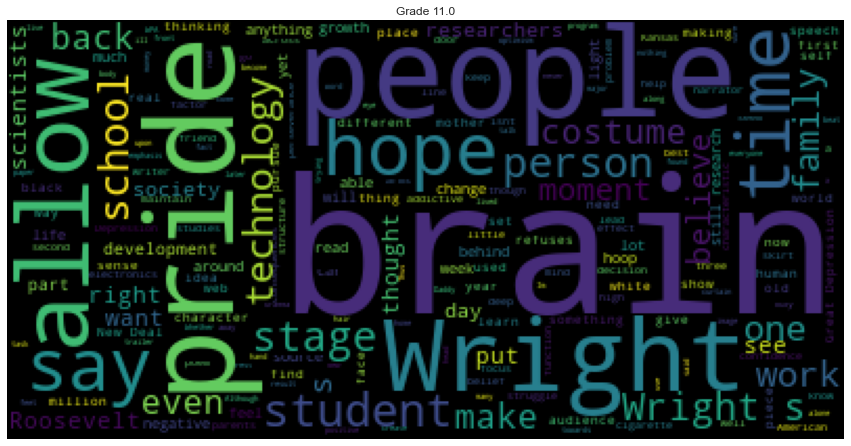

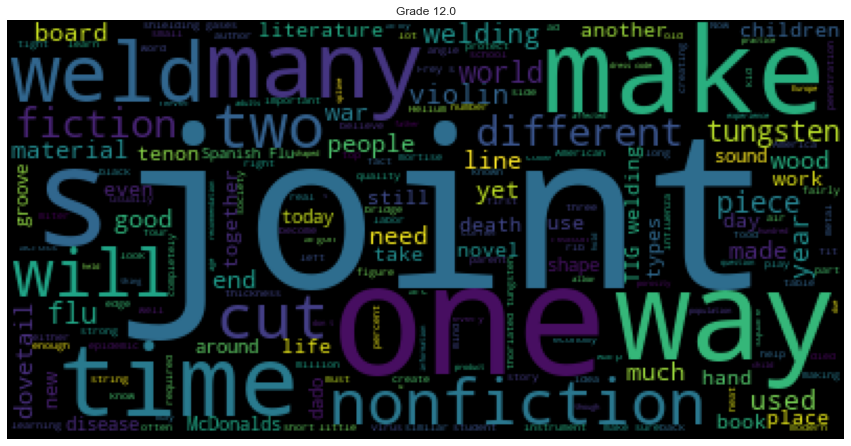

In [28]:
for grade in sorted(df.Grade.unique()):
    text = ' '.join([story for story in df.loc[df.Grade == grade, 'Text']])
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.title('Grade {}'.format(grade))
    plt.axis('off')
    plt.show()

#FSM

In [29]:
FSM = np.random.randint(low=0, high=13, size=len(y_test))
FSM_MAE = np.sum(np.abs(y_test - FSM))/len(y_test)
print(FSM_MAE)

4.0293432696786216


# Random Forest Regressor

In [30]:
Vectorizer = TextVectorization(output_mode='tf-idf', max_tokens=2000)
Vectorizer.adapt(X_t.to_numpy())
X_t_tfidf = Vectorizer(X_t)
X_val_tfidf = Vectorizer(X_val)

RF_reg = RandomForestRegressor().fit(X_t_tfidf, y_t)
yhat = RF_reg.predict(X_val_tfidf)
mae = np.sum(np.abs(y_val - yhat))/len(y_val)
print('MAE for TF-IDF vectors = ', mae)

MAE for TF-IDF vectors =  2.139304891991993


# Multi-Layer Perceptron

Epoch 1/100
65/69 [===========================>..] - ETA: 0s - loss: 4.3136
Epoch 00001: val_loss improved from inf to 2.95970, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
69/69 [==============================] - 6s 86ms/step - loss: 4.2588 - val_loss: 2.9597
Epoch 2/100
69/69 [==============================] - ETA: 0s - loss: 2.8830
Epoch 00002: val_loss improved from 2.95970 to 2.69347, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
69/69 [==============================] - 6s 84ms/step - loss: 2.8830 - val_loss: 2.6935
Epoch 3/100
68/69 [============================>.] - ETA: 0s - loss: 2.5326
Epoch 00003: val_loss improved from 2.69347 to 2.50608, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
69/69 [==============================] - 6s 86ms/step - loss: 2.5297 - val_loss: 2.5061
Epoch 4/100
65/69 [===========================>..] - ETA: 0s - loss: 2.3568
Epoch 00004: val_loss did not improve fr

Epoch 36/100
68/69 [============================>.] - ETA: 0s - loss: 1.1584
Epoch 00036: val_loss did not improve from 1.90932
69/69 [==============================] - 1s 15ms/step - loss: 1.1617 - val_loss: 1.9537
Epoch 37/100
69/69 [==============================] - ETA: 0s - loss: 1.1434
Epoch 00037: val_loss did not improve from 1.90932
69/69 [==============================] - 1s 14ms/step - loss: 1.1434 - val_loss: 1.9347
Epoch 38/100
68/69 [============================>.] - ETA: 0s - loss: 1.1282
Epoch 00038: val_loss did not improve from 1.90932
69/69 [==============================] - 1s 15ms/step - loss: 1.1305 - val_loss: 1.9866
Epoch 39/100
65/69 [===========================>..] - ETA: 0s - loss: 1.1306
Epoch 00039: val_loss did not improve from 1.90932
69/69 [==============================] - 1s 14ms/step - loss: 1.1262 - val_loss: 1.9263
Epoch 40/100
67/69 [============================>.] - ETA: 0s - loss: 1.1337
Epoch 00040: val_loss did not improve from 1.90932
69/69 [=

66/69 [===========================>..] - ETA: 0s - loss: 0.9955
Epoch 00072: val_loss did not improve from 1.85940
69/69 [==============================] - 1s 14ms/step - loss: 0.9955 - val_loss: 1.8959
Epoch 73/100
67/69 [============================>.] - ETA: 0s - loss: 0.9999
Epoch 00073: val_loss did not improve from 1.85940
69/69 [==============================] - 1s 14ms/step - loss: 0.9996 - val_loss: 1.8732
Epoch 74/100
65/69 [===========================>..] - ETA: 0s - loss: 0.9618
Epoch 00074: val_loss improved from 1.85940 to 1.85047, saving model to best-MLP
INFO:tensorflow:Assets written to: best-MLP\assets
69/69 [==============================] - 5s 68ms/step - loss: 0.9597 - val_loss: 1.8505
Epoch 75/100
68/69 [============================>.] - ETA: 0s - loss: 0.9779
Epoch 00075: val_loss did not improve from 1.85047
69/69 [==============================] - 1s 13ms/step - loss: 0.9787 - val_loss: 1.8696
Epoch 76/100
65/69 [===========================>..] - ETA: 0s - loss

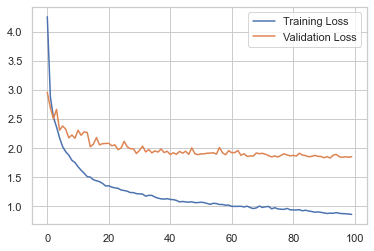

MAE =  1.909838064748518
mean grade prediction =  6.925541
mean grade =  6.96227293898463


Text  \
5262    One mother dreams of doing this on her trip to a new life: In America I will have a daughter just like me    
7465                                                                                                 I was worried   
9619                                                                                          had assaulted my ego   
676                                                        on a warm spring Wednesday  and it was storming outside   
10431                                                                                    boards over the dado bade   

       Grade  Predicted Grade  
5262     9.0         8.708805  
7465     4.0         3.762805  
9619    11.0         4.364311  
676      4.0         4.045798  
10431   12.0        10.935571

In [31]:

model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer2)
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(1, activation='relu'))
sgd = optimizers.SGD(learning_rate=0.1, decay=1e-2)
model.compile(optimizer='adam', loss='mean_absolute_error')
filepath = 'best-MLP'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf'
                             )
callbacks = [checkpoint]

history = model.fit(X_train,
            y_train,
            epochs=100,
            batch_size=100,
            validation_split = .2,
            verbose=1,
            callbacks=callbacks)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

In [32]:
longest_sentence = X_train.str.len().max()
Vectorizer = TextVectorization(output_sequence_length=longest_sentence, max_tokens=2000)
Vectorizer.adapt(X_train.to_numpy())
nlp = en_core_web_lg.load()
vocab = Vectorizer.get_vocabulary()
#generate the embedding matrix
num_tokens = len(vocab)
embedding_dim = len(nlp('The').vector)
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
    embedding_matrix[i] = nlp(word).vector

#Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
Embedding_layer=Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False)

# RNN LSTM

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_7 (TextVe (None, 364)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 364, 300)          600000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 364, 100)          160400    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)              

Epoch 23/100
69/69 [==============================] - ETA: 0s - loss: 1.8268
Epoch 00023: val_loss did not improve from 1.94800
69/69 [==============================] - 129s 2s/step - loss: 1.8268 - val_loss: 2.0744
Epoch 24/100
69/69 [==============================] - ETA: 0s - loss: 1.8484
Epoch 00024: val_loss did not improve from 1.94800
69/69 [==============================] - 131s 2s/step - loss: 1.8484 - val_loss: 2.0172
Epoch 25/100
69/69 [==============================] - ETA: 0s - loss: 1.7692
Epoch 00025: val_loss did not improve from 1.94800
69/69 [==============================] - 134s 2s/step - loss: 1.7692 - val_loss: 2.0574
Epoch 26/100
69/69 [==============================] - ETA: 0s - loss: 1.7559
Epoch 00026: val_loss did not improve from 1.94800
69/69 [==============================] - 131s 2s/step - loss: 1.7559 - val_loss: 2.0802
Epoch 27/100
69/69 [==============================] - ETA: 0s - loss: 1.7486
Epoch 00027: val_loss did not improve from 1.94800
69/69 [=

69/69 [==============================] - ETA: 0s - loss: 1.4103
Epoch 00060: val_loss did not improve from 1.93573
69/69 [==============================] - 137s 2s/step - loss: 1.4103 - val_loss: 1.9525
Epoch 61/100
69/69 [==============================] - ETA: 0s - loss: 1.4022
Epoch 00061: val_loss did not improve from 1.93573
69/69 [==============================] - 142s 2s/step - loss: 1.4022 - val_loss: 1.9968
Epoch 62/100
69/69 [==============================] - ETA: 0s - loss: 1.3916
Epoch 00062: val_loss did not improve from 1.93573
69/69 [==============================] - 141s 2s/step - loss: 1.3916 - val_loss: 1.9506
Epoch 63/100
69/69 [==============================] - ETA: 0s - loss: 1.3732
Epoch 00063: val_loss did not improve from 1.93573
69/69 [==============================] - 140s 2s/step - loss: 1.3732 - val_loss: 2.0113
Epoch 64/100
69/69 [==============================] - ETA: 0s - loss: 1.3700
Epoch 00064: val_loss did not improve from 1.93573
69/69 [==============

Epoch 98/100
69/69 [==============================] - ETA: 0s - loss: 1.2503
Epoch 00098: val_loss did not improve from 1.93573
69/69 [==============================] - 138s 2s/step - loss: 1.2503 - val_loss: 1.9745
Epoch 99/100
69/69 [==============================] - ETA: 0s - loss: 1.2467
Epoch 00099: val_loss did not improve from 1.93573
69/69 [==============================] - 137s 2s/step - loss: 1.2467 - val_loss: 1.9760
Epoch 100/100
69/69 [==============================] - ETA: 0s - loss: 1.2485
Epoch 00100: val_loss did not improve from 1.93573
69/69 [==============================] - 138s 2s/step - loss: 1.2485 - val_loss: 1.9851


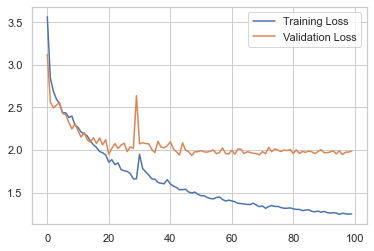

MAE =  1.9415100365946556
mean grade prediction =  6.7795334
mean grade =  6.96227293898463


Text  \
6026                                                                                                                                                                                                        John read us a story about frogs   
4630                                                                                                                   I can recall countless times that Katie and I woke up late and found ourselves running down the road to catch the bus   
4463                                                                                                                                                                                 it seems to have been there since the beginning of time   
9201   He spends three days being dragged in his skiff by the enormous marlin with minimal food and water, all the while enduring acute physical pain, tiredness, and an unending loneliness due to the absence of his young friend, Manolin   
3070                                                                                                                                                                                                                                    Hmmm   

      Grade  Predicted Grade  
6026    6.0         4.001542  
4630    9.0         8.266268  
4463    9.0         6.393728  
9201    8.0         8.657041  
3070    5.0         6.098090

In [33]:
filepath = 'model-LSTM-best'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4))) 
model.add(Dropout(0.3))

model.add(Dense(1))

adam = optimizers.Adam(learning_rate=.01, decay=1e-3)
model.compile(optimizer = adam, loss = 'mean_absolute_error', metrics = None)

print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf')
callbacks = [checkpoint]

history = model.fit(X_train, y_train,
                     batch_size=100,
                     epochs=100,
                     validation_split=.2,
                    callbacks=callbacks
                    )

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_7 (TextVe (None, 364)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 364, 300)          600000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 364, 200)          320800    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 200)               0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               25728     
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)              

Epoch 23/100
69/69 [==============================] - ETA: 0s - loss: 1.9740
Epoch 00023: val_loss did not improve from 2.08734
69/69 [==============================] - 645s 9s/step - loss: 1.9740 - val_loss: 2.0962
Epoch 24/100
69/69 [==============================] - ETA: 0s - loss: 1.9361
Epoch 00024: val_loss did not improve from 2.08734
69/69 [==============================] - 678s 10s/step - loss: 1.9361 - val_loss: 2.1060
Epoch 25/100
69/69 [==============================] - ETA: 0s - loss: 1.9728
Epoch 00025: val_loss improved from 2.08734 to 2.07777, saving model to model-Bi-LSTM-best
INFO:tensorflow:Assets written to: model-Bi-LSTM-best\assets
69/69 [==============================] - 676s 10s/step - loss: 1.9728 - val_loss: 2.0778
Epoch 26/100
69/69 [==============================] - ETA: 0s - loss: 1.9071
Epoch 00026: val_loss improved from 2.07777 to 2.07231, saving model to model-Bi-LSTM-best
INFO:tensorflow:Assets written to: model-Bi-LSTM-best\assets
69/69 [=============

Epoch 57/100
69/69 [==============================] - ETA: 0s - loss: 1.6024
Epoch 00057: val_loss did not improve from 1.94226
69/69 [==============================] - 665s 10s/step - loss: 1.6024 - val_loss: 1.9432
Epoch 58/100
69/69 [==============================] - ETA: 0s - loss: 1.5734
Epoch 00058: val_loss did not improve from 1.94226
69/69 [==============================] - 669s 10s/step - loss: 1.5734 - val_loss: 1.9770
Epoch 59/100
69/69 [==============================] - ETA: 0s - loss: 1.5594
Epoch 00059: val_loss did not improve from 1.94226
69/69 [==============================] - 665s 10s/step - loss: 1.5594 - val_loss: 1.9843
Epoch 60/100
69/69 [==============================] - ETA: 0s - loss: 1.5615
Epoch 00060: val_loss did not improve from 1.94226
69/69 [==============================] - 667s 10s/step - loss: 1.5615 - val_loss: 1.9611
Epoch 61/100
69/69 [==============================] - ETA: 0s - loss: 1.5565
Epoch 00061: val_loss did not improve from 1.94226
69/6

Epoch 94/100
69/69 [==============================] - ETA: 0s - loss: 1.4345
Epoch 00094: val_loss did not improve from 1.91053
69/69 [==============================] - 682s 10s/step - loss: 1.4345 - val_loss: 1.9940
Epoch 95/100
69/69 [==============================] - ETA: 0s - loss: 1.4235
Epoch 00095: val_loss did not improve from 1.91053
69/69 [==============================] - 683s 10s/step - loss: 1.4235 - val_loss: 1.9526
Epoch 96/100
69/69 [==============================] - ETA: 0s - loss: 1.4349
Epoch 00096: val_loss did not improve from 1.91053
69/69 [==============================] - 683s 10s/step - loss: 1.4349 - val_loss: 2.0025
Epoch 97/100
69/69 [==============================] - ETA: 0s - loss: 1.4191
Epoch 00097: val_loss did not improve from 1.91053
69/69 [==============================] - 682s 10s/step - loss: 1.4191 - val_loss: 1.9806
Epoch 98/100
69/69 [==============================] - ETA: 0s - loss: 1.4017
Epoch 00098: val_loss did not improve from 1.91053
69/6

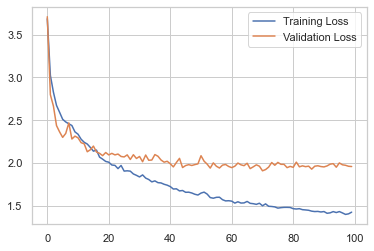

MAE =  1.9890707863948487
mean grade prediction =  6.9171863
mean grade =  6.96227293898463


Text  \
4844                                                                                         Half the school doesnt even know youre alive   
3958                                                                                                               You need a career goal   
8431                                                         In its absence   people feel bored   says Matt Richtel of the New York Times   
6348   Jem is too young to really understand   but Atticus knows his case is changing the views and thoughts of racism in their community   
4342                                        They will no longer be a part of South Africa  but South Africa will always be a part of them   

      Grade  Predicted Grade  
4844    9.0         5.991477  
3958    9.0         7.871258  
8431   11.0         5.993896  
6348    9.0         8.714045  
4342    9.0         6.136079

In [34]:
filepath = 'model-Bi-LSTM-best'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))  
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4))) 
model.add(Dropout(0.3))

model.add(Dense(1))

adam = optimizers.Adam(learning_rate=.01, decay=1e-3)
model.compile(optimizer = adam, loss = 'mean_absolute_error', metrics = None)

print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf')
callbacks = [checkpoint]

history = model.fit(X_train, y_train,
                     batch_size=100,
                     epochs=100,
                     validation_split=.2,
                    callbacks=callbacks
                    )

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

# Hybrid

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_7 (TextVe (None, 364)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 364, 300)          600000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 364, 100)          160400    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 100)               0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)              

Epoch 21/100
7/7 [==============================] - ETA: 0s - loss: 2.5656 
Epoch 00021: val_loss did not improve from 2.62814
7/7 [==============================] - 88s 13s/step - loss: 2.5656 - val_loss: 3.3913
Epoch 22/100
7/7 [==============================] - ETA: 0s - loss: 2.4896 
Epoch 00022: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 2.4896 - val_loss: 3.2762
Epoch 23/100
7/7 [==============================] - ETA: 0s - loss: 2.4929 
Epoch 00023: val_loss did not improve from 2.62814
7/7 [==============================] - 85s 12s/step - loss: 2.4929 - val_loss: 3.3024
Epoch 24/100
7/7 [==============================] - ETA: 0s - loss: 2.4411 
Epoch 00024: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 2.4411 - val_loss: 3.1539
Epoch 25/100
7/7 [==============================] - ETA: 0s - loss: 2.4267 
Epoch 00025: val_loss did not improve from 2.62814
7/7 [================

Epoch 60/100
7/7 [==============================] - ETA: 0s - loss: 2.0007 
Epoch 00060: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 2.0007 - val_loss: 3.1159
Epoch 61/100
7/7 [==============================] - ETA: 0s - loss: 2.0044 
Epoch 00061: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 2.0044 - val_loss: 3.0490
Epoch 62/100
7/7 [==============================] - ETA: 0s - loss: 1.9570 
Epoch 00062: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 1.9570 - val_loss: 3.0191
Epoch 63/100
7/7 [==============================] - ETA: 0s - loss: 1.9739 
Epoch 00063: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 1.9739 - val_loss: 3.1006
Epoch 64/100
7/7 [==============================] - ETA: 0s - loss: 1.9489 
Epoch 00064: val_loss did not improve from 2.62814
7/7 [================

Epoch 99/100
7/7 [==============================] - ETA: 0s - loss: 1.7761 
Epoch 00099: val_loss did not improve from 2.62814
7/7 [==============================] - 86s 12s/step - loss: 1.7761 - val_loss: 3.1607
Epoch 100/100
7/7 [==============================] - ETA: 0s - loss: 1.7760 
Epoch 00100: val_loss did not improve from 2.62814
7/7 [==============================] - 87s 12s/step - loss: 1.7760 - val_loss: 3.0313


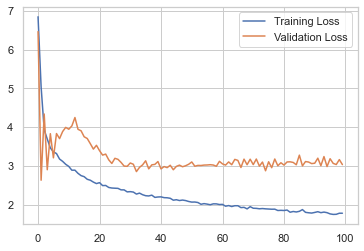

MAE =  2.6474722931981365
mean grade prediction =  6.428568
mean grade =  6.96227293898463


Text  \
5908   But before Bob could run off to safety  Gerald grabbed Bob by the scruff of his neck and with a terrible jerk  Bob fell backwards and he fell flat on his back on Gerald   
8466                                Due to the positive aspects of technology and social media   I would not suggest that the school remove technology or social media for good   
993                                                When Suzie and I first started calling one another  I thought it would be more of a burden on me  but I was completely wrong   
6930                                                                                                 The golgi bodies package and ship substances from place to place in a cell   
4762                                               It felt like someone had reached down my throat and  with strong fingers  drawn my breath and stomach from my trembling body   

      Grade  Predicted Grade  
5908    3.0         7.414179  
8466    9.0         7.508182  
993     6.0         7.519895  
6930    8.0         7.081765  
4762    9.0         7.285458

In [35]:
filepath = 'model-LSTM-MLP-hybrid'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(1, activation='relu'))
sgd = optimizers.SGD(learning_rate=0.1, decay=1e-2)
model.compile(optimizer='adam', loss='mean_absolute_error')
print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf'
                             )
callbacks = [checkpoint]

history = model.fit(X_train,
            y_train,
            epochs=100,
            batch_size=1000,
            validation_split = .2,
            verbose=1,
            callbacks=callbacks)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

# Hybrid Bi-directional

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_7 (TextVe (None, 364)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 364, 300)          600000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 364, 200)          320800    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 200)               0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               25728     
_________________________________________________________________
dropout_65 (Dropout)         (None, 128)              

687/687 [==============================] - 1916s 3s/step - loss: 1.8441 - val_loss: 1.8809
Epoch 17/100
687/687 [==============================] - ETA: 0s - loss: 1.7960
Epoch 00017: val_loss did not improve from 1.88093
687/687 [==============================] - 1918s 3s/step - loss: 1.7960 - val_loss: 1.9046
Epoch 18/100
687/687 [==============================] - ETA: 0s - loss: 1.7771
Epoch 00018: val_loss did not improve from 1.88093
687/687 [==============================] - 1918s 3s/step - loss: 1.7771 - val_loss: 1.8901
Epoch 19/100
687/687 [==============================] - ETA: 0s - loss: 1.7747
Epoch 00019: val_loss did not improve from 1.88093
687/687 [==============================] - 1909s 3s/step - loss: 1.7747 - val_loss: 1.8991
Epoch 20/100
687/687 [==============================] - ETA: 0s - loss: 1.8317
Epoch 00020: val_loss did not improve from 1.88093
687/687 [==============================] - 1916s 3s/step - loss: 1.8317 - val_loss: 1.9231
Epoch 21/100
687/687 [===

687/687 [==============================] - ETA: 0s - loss: 1.3570
Epoch 00051: val_loss did not improve from 1.73636
687/687 [==============================] - 2273s 3s/step - loss: 1.3570 - val_loss: 1.7812
Epoch 52/100
687/687 [==============================] - ETA: 0s - loss: 1.3450
Epoch 00052: val_loss did not improve from 1.73636
687/687 [==============================] - 2322s 3s/step - loss: 1.3450 - val_loss: 1.7922
Epoch 53/100
687/687 [==============================] - ETA: 0s - loss: 1.3374
Epoch 00053: val_loss did not improve from 1.73636
687/687 [==============================] - 2223s 3s/step - loss: 1.3374 - val_loss: 1.7805
Epoch 54/100
687/687 [==============================] - ETA: 0s - loss: 1.3398
Epoch 00054: val_loss did not improve from 1.73636
687/687 [==============================] - 2275s 3s/step - loss: 1.3398 - val_loss: 1.7887
Epoch 55/100
687/687 [==============================] - ETA: 0s - loss: 1.3208
Epoch 00055: val_loss improved from 1.73636 to 1.7

Epoch 88/100
687/687 [==============================] - ETA: 0s - loss: 1.1760
Epoch 00088: val_loss did not improve from 1.72326
687/687 [==============================] - 2461s 4s/step - loss: 1.1760 - val_loss: 1.7982
Epoch 89/100
687/687 [==============================] - ETA: 0s - loss: 1.1507
Epoch 00089: val_loss did not improve from 1.72326
687/687 [==============================] - 2443s 4s/step - loss: 1.1507 - val_loss: 1.7378
Epoch 90/100
687/687 [==============================] - ETA: 0s - loss: 1.1617
Epoch 00090: val_loss did not improve from 1.72326
687/687 [==============================] - 2465s 4s/step - loss: 1.1617 - val_loss: 1.8067
Epoch 91/100
687/687 [==============================] - ETA: 0s - loss: 1.1611
Epoch 00091: val_loss did not improve from 1.72326
687/687 [==============================] - 2465s 4s/step - loss: 1.1611 - val_loss: 1.7947
Epoch 92/100
687/687 [==============================] - ETA: 0s - loss: 1.1946
Epoch 00092: val_loss did not improve

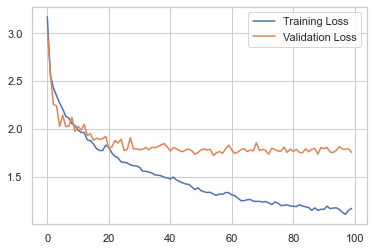

MAE =  1.83572242745256
mean grade prediction =  6.880185
mean grade =  6.96227293898463


Text  \
3355                                                                                                                                          And she still does   
9535                                                                              He started taking young animals and selling them or using them for his own use   
10669                                                                                    to ask questions if you need to since someone’s life could depend on it   
8484    For example   even when Tom runs away to be a pirate   he still feels that he should say his prayers   even though nobody is there to tell him he has to   
2069                                                                                              Some writers dont read other writers because of it  Grear said   

       Grade  Predicted Grade  
3355     6.0         6.216122  
9535    10.0         6.598546  
10669   12.0         6.299443  
8484     6.0         6.128114  
2069     9.0         6.340549

In [36]:
filepath = 'model-BiLSTM-MLP-hybrid'
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(Vectorizer)
model.add(Embedding_layer)
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.2))
model.add(Dense(1, activation='relu'))
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-3)
model.compile(optimizer='adam', loss='mean_absolute_error')
print(model.summary())
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True,
                             mode='min',
                             save_format='tf'
                             )
callbacks = [checkpoint]

history = model.fit(X_train,
            y_train,
            epochs=100,
            batch_size=10,
            validation_split = .2,
            verbose=1,
            callbacks=callbacks)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

model = keras.models.load_model(filepath)
yhat = model.predict(X_test).ravel()
print('MAE = ', np.sum(np.abs(y_test-yhat))/len(y_test))
print('mean grade prediction = ', np.mean(model.predict(X_test)))
print('mean grade = ', np.mean(y_test))

errors = df.loc[y_test.index][['Text','Grade']]
errors['Predicted Grade'] = yhat
errors.sample(5)

In [37]:
np.abs(y_test - yhat).std()

1.6833383140185059